In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
np.random.seed(50)
citrus_acid = np.random.uniform(1, 5, 200)
density = np.random.uniform(9930, 9970, 200)
quality = 15000 * (citrus_acid / density)


In [3]:
wine = pd.DataFrame({"Citrus_Acid": citrus_acid, "Density": density, "Quality": quality})

In [4]:
def classify_quality(q):
    if 5 <= q < 6.5:
        return "Normal"
    elif 6.5 <= q < 8:
        return "Good"
    elif 8 <= q <= 10:
        return "Best"

In [5]:
wine['Wine_Status'] = wine['Quality'].apply(classify_quality)

In [6]:
le = LabelEncoder()
wine['Wine_Status_Label'] = le.fit_transform(wine['Wine_Status'])

In [7]:
X = wine[['Citrus_Acid', 'Density']]
y = wine['Wine_Status_Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [9]:
y_pred = knn.predict(X_test)

In [10]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [11]:
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.7166666666666667
Confusion Matrix:
[[ 7  4  1]
 [ 2  9  3]
 [ 0  7 27]]


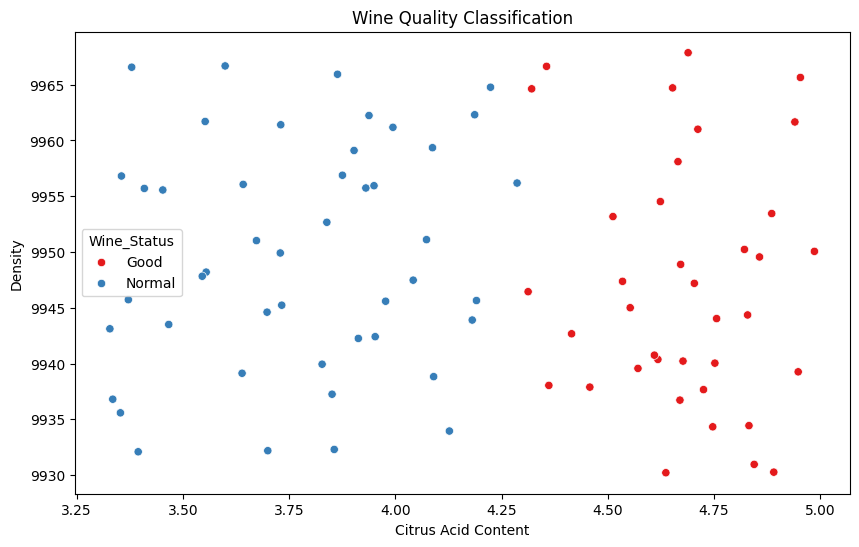

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=wine, x='Citrus_Acid', y='Density', hue='Wine_Status', palette='Set1')
plt.title('Wine Quality Classification')
plt.xlabel('Citrus Acid Content')
plt.ylabel('Density')
plt.show()